In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant IV.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant V.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant I.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant III.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant II.csv


In [13]:
df1='/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv'

In [14]:
df=pd.read_csv(df1)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import zscore


from transformers import pipeline
from transformers import BertTokenizer
import re

In [16]:
exclude_column = ['credit_risk_score','device_os','source','housing_status','employment_status','payment_type']
for col in df.columns:
    if col not in exclude_column:
        df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)

In [17]:
df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount              742523
payment_type                             0
zip_count_4w                             0
velocity_6h                             44
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

In [18]:
df = df[~((df['bank_months_count'].isna()) & (df['fraud_bool'] == 0))]

In [19]:
df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           551881
current_address_months_count          3156
customer_age                             0
days_since_request                       0
intended_balcon_amount              497700
payment_type                             0
zip_count_4w                             0
velocity_6h                             42
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                     4140
has_other_cards                          0
proposed_cr

In [20]:
df.drop(columns=['prev_address_months_count','intended_balcon_amount'], inplace=True)

In [21]:
df = df[~((df['session_length_in_minutes'].isna()) & (df['fraud_bool'] == 0))]

In [22]:
df = df[~((df['bank_months_count'].isna()) & (df['fraud_bool'] == 0))]

In [23]:
df = df[~((df['velocity_6h'].isna()) & (df['fraud_bool'] == 0))]

In [24]:
df= df[~((df['device_distinct_emails_8w'].isna()) & (df['fraud_bool'] == 0))]

In [25]:
count=((df['bank_months_count'].isna()) & (df['fraud_bool'] == 1)).sum()
print(count) ##toutes les valeurs nulles correspond a une fraude !!!!!!

4140


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from scipy.spatial import distance
from itertools import combinations


In [27]:
df.fillna(0, inplace=True)

In [28]:
colonnes_avec_nan = df.columns[df.isna().any()].tolist()

print("Colonnes contenant des valeurs NaN :", colonnes_avec_nan)

Colonnes contenant des valeurs NaN : []


In [29]:
print(df.columns)

Index(['fraud_bool', 'income', 'name_email_similarity',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')


In [30]:
Y = df['fraud_bool']

In [31]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud_bool, dtype: int64

In [32]:
X = df.drop(columns=['fraud_bool'], inplace=True)

In [33]:
df.head()

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0.3,0.986506,25.0,40,0.006735,AA,1059,13096.035018,7850.955007,6742.080561,...,0,1500.0,0,INTERNET,16.224843,linux,1,1.0,0,0
1,0.8,0.617426,89.0,20,0.010095,AD,1658,9223.283431,5745.251481,5941.664859,...,0,1500.0,0,INTERNET,3.363854,other,1,1.0,0,0
2,0.8,0.996707,14.0,40,0.012316,AB,1095,4471.472149,5471.988958,5992.555113,...,0,200.0,0,INTERNET,22.730559,windows,0,1.0,0,0
3,0.6,0.475100,14.0,30,0.006991,AB,3483,14431.993621,6755.344479,5970.336831,...,0,200.0,0,INTERNET,15.215816,linux,1,1.0,0,0
4,0.9,0.842307,29.0,40,5.742626,AA,2339,7601.511579,5124.046930,5940.734212,...,0,200.0,0,INTERNET,3.743048,other,0,1.0,0,0


In [34]:
dfb = df
dfb['email_is_free'] = dfb['email_is_free'].astype('category')
dfb['phone_home_valid'] = dfb['phone_home_valid'].astype('category')
dfb['phone_mobile_valid'] = dfb['phone_mobile_valid'].astype('category')
dfb['has_other_cards'] = dfb['has_other_cards'].astype('category')
dfb['foreign_request'] = dfb['foreign_request'].astype('category')
dfb['keep_alive_session'] = dfb['keep_alive_session'].astype('category')

In [35]:
categorical_columns = dfb.select_dtypes(include=['object', 'category']).columns
numerical_columns = dfb.select_dtypes(include=['number']).columns
dfb.drop(columns=['device_fraud_count'], inplace=True)
numerical_columns = dfb.select_dtypes(include=['number']).columns

In [36]:
dfb_encoded = pd.get_dummies(dfb, categorical_columns)

In [37]:
dfb_encoded.head(10)

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,foreign_request_1,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_0,keep_alive_session_1
0,0.3,0.986506,25.0,40,0.006735,1059,13096.035018,7850.955007,6742.080561,5,...,False,True,False,True,False,False,False,False,False,True
1,0.8,0.617426,89.0,20,0.010095,1658,9223.283431,5745.251481,5941.664859,3,...,False,True,False,False,False,True,False,False,False,True
2,0.8,0.996707,14.0,40,0.012316,1095,4471.472149,5471.988958,5992.555113,15,...,False,True,False,False,False,False,True,False,True,False
3,0.6,0.475100,14.0,30,0.006991,3483,14431.993621,6755.344479,5970.336831,11,...,False,True,False,True,False,False,False,False,False,True
4,0.9,0.842307,29.0,40,5.742626,2339,7601.511579,5124.046930,5940.734212,1,...,False,True,False,False,False,True,False,False,True,False
5,0.6,0.294840,369.0,30,0.024232,1204,11556.955514,7506.951276,6482.924037,705,...,False,True,False,True,False,False,False,False,False,True
6,0.2,0.773085,4.0,40,0.006919,1998,11723.993606,7864.277144,6338.799156,28,...,False,True,False,False,False,False,False,True,False,True
7,0.8,0.153880,103.0,40,0.045122,1548,4999.555801,4526.861667,6426.790817,6,...,False,True,False,False,False,True,False,False,False,True
8,0.3,0.523655,2.0,30,0.035206,1781,6979.994002,4335.685346,6624.957942,2,...,False,True,False,False,False,True,False,False,False,True
9,0.8,0.834475,134.0,20,0.017245,3113,7549.992086,6273.922110,6312.998835,14,...,False,True,False,False,False,True,False,False,False,True


In [38]:
dfb_encoded.dtypes

income                              float64
name_email_similarity               float64
current_address_months_count        float64
customer_age                          int64
days_since_request                  float64
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
credit_risk_score                     int64
bank_months_count                   float64
proposed_credit_limit               float64
session_length_in_minutes           float64
device_distinct_emails_8w           float64
month                                 int64
payment_type_AA                        bool
payment_type_AB                        bool
payment_type_AC                        bool
payment_type_AD                        bool
payment_type_AE                        bool
employment_status_CA            

In [39]:
scaler = StandardScaler()
dfb_scaled = scaler.fit_transform(dfb_encoded)

In [40]:
# Appliquer K-means avec un nombre K de clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(dfb_scaled)


KMeans(n_clusters=2, n_init=10, random_state=0)

In [41]:
dfb.shape[0]

749619

In [42]:
# Obtenir les centres des clusters et les étiquettes
centers = kmeans.cluster_centers_
labels = kmeans.labels_
inertie = kmeans.inertia_

print(centers)
print(labels)
print(inertie)

dfb_encoded['cluster'] = labels
# Ajouter les etiquettes au jeu de données
for i in range(5):  # Assurez-vous que la taille correspond
    print(dfb_encoded.iloc[i], dfb_scaled[i], Y[i], dfb_encoded['cluster'].iloc[i])

[[-0.018099    0.00368709 -0.1175669  -0.19938507  0.03253148  0.03327207
   0.03374194  0.04820617  0.05238824 -0.04182279  0.15477034 -0.00464389
  -0.02217425 -0.00444771  0.03830851 -0.01073367 -0.05200587  0.01274682
  -0.0446075   0.02221425  0.03495738  0.00368122  0.09184989 -0.03329891
  -0.11376789  0.00339597  0.01054335 -0.04857561 -0.00205969 -0.01579931
   0.01579931 -0.03271598 -0.0765444   0.05652757 -0.00592199  0.04930305
  -0.0064931  -0.00165745  0.87714416 -0.87714416 -0.26294333  0.26294333
   0.09475843 -0.09475843 -0.0034581   0.0034581   0.00558175 -0.00558175
  -0.02183397  0.03812217  0.0387919  -0.03771753 -0.00130205  0.0379169
  -0.0379169 ]
 [ 0.02290274 -0.0046657   0.14877091  0.25230484 -0.04116582 -0.04210297
  -0.04269755 -0.06100081 -0.06629286  0.05292318 -0.1958487   0.00587645
   0.02805962  0.0056282  -0.04847616  0.01358255  0.065809   -0.01613002
   0.056447   -0.02811025 -0.04423559 -0.00465828 -0.11622822  0.04213693
   0.14396358 -0.0042973

In [43]:
# Calculer le nombre d'éléments dans chaque cluster
unique_labels, counts = np.unique(labels, return_counts=True)

# Afficher le nombre d'éléments dans chaque cluster
for cluster, count in zip(unique_labels, counts):
    print(f"Cluster {cluster}: {count} éléments")

Cluster 0: 418819 éléments
Cluster 1: 330800 éléments


In [44]:
from sklearn.metrics import accuracy_score, recall_score

In [45]:
# Convertir les étiquettes de cluster en étiquettes de classe (pour comparaison avec les étiquettes réelles)
# Cette étape peut nécessiter un ajustement pour aligner les étiquettes de cluster avec les étiquettes réelles
# car K-means attribue des numéros de cluster arbitraires.
# On utilise une méthode simple basée sur la fréquence des étiquettes réelles dans chaque cluster pour 
# déterminer quelle étiquette réelle est la plus courante dans chaque cluster. 
# Cela devrait aider à aligner correctement les clusters avec les classes réelles 

# Convertir les étiquettes de cluster en étiquettes de classe
label_mapping = {}
for cluster in range(num_clusters):
    # Obtenez les indices des points dans le cluster actuel
    cluster_indices = np.where(labels == cluster)[0]

    # Obtenez les étiquettes réelles correspondantes à ces indices
    true_labels_in_cluster = Y.iloc[cluster_indices].values

    # Trouvez l'étiquette réelle la plus fréquente dans le cluster
    most_common_label = np.argmax(np.bincount(true_labels_in_cluster))

    # Associez le numéro du cluster à l'étiquette réelle la plus fréquente
    label_mapping[cluster] = most_common_label

# Appliquez la correspondance au tableau des étiquettes de cluster pour obtenir les étiquettes prédites
predicted_labels = np.vectorize(label_mapping.get)(labels)

# Calculer l'accuracy
accuracy = accuracy_score(Y, predicted_labels)

# Afficher le résultat
print(f'Accuracy : {accuracy}')

# Calculer le recall (rappel)
recall = recall_score(Y, predicted_labels, average='macro')  # 'macro' pour moyenner sur toutes les classes

# Afficher les résultats
print(f'Accuracy : {accuracy}')
print(f'Recall : {recall}')

for i in range(4):
    print (dfb_encoded.iloc[i], Y[i], predicted_labels[i])


    


Accuracy : 0.9852871925604874
Accuracy : 0.9852871925604874
Recall : 0.5
income                                       0.3
name_email_similarity                   0.986506
current_address_months_count                25.0
customer_age                                  40
days_since_request                      0.006735
zip_count_4w                                1059
velocity_6h                         13096.035018
velocity_24h                         7850.955007
velocity_4w                          6742.080561
bank_branch_count_8w                           5
date_of_birth_distinct_emails_4w               5
credit_risk_score                            163
bank_months_count                            9.0
proposed_credit_limit                     1500.0
session_length_in_minutes              16.224843
device_distinct_emails_8w                    1.0
month                                          0
payment_type_AA                             True
payment_type_AB                            Fa

In [46]:
dfb_encoded.head()

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_0,keep_alive_session_1,cluster
0,0.3,0.986506,25.0,40,0.006735,1059,13096.035018,7850.955007,6742.080561,5,...,True,False,True,False,False,False,False,False,True,0
1,0.8,0.617426,89.0,20,0.010095,1658,9223.283431,5745.251481,5941.664859,3,...,True,False,False,False,True,False,False,False,True,1
2,0.8,0.996707,14.0,40,0.012316,1095,4471.472149,5471.988958,5992.555113,15,...,True,False,False,False,False,True,False,True,False,0
3,0.6,0.475100,14.0,30,0.006991,3483,14431.993621,6755.344479,5970.336831,11,...,True,False,True,False,False,False,False,False,True,0
4,0.9,0.842307,29.0,40,5.742626,2339,7601.511579,5124.046930,5940.734212,1,...,True,False,False,False,True,False,False,True,False,1


In [47]:
Y = pd.DataFrame(Y, columns=['fraud_bool'])

In [48]:
Y.head()

,fraud_bool
0,0
1,0
2,0
3,0
4,0


In [49]:
r = pd.concat([dfb_encoded, Y], axis=0, ignore_index=True)

In [50]:
r.head()

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_0,keep_alive_session_1,cluster,fraud_bool
0,0.3,0.986506,25.0,40.0,0.006735,1059.0,13096.035018,7850.955007,6742.080561,5.0,...,False,True,False,False,False,False,False,True,0.0,NaN
1,0.8,0.617426,89.0,20.0,0.010095,1658.0,9223.283431,5745.251481,5941.664859,3.0,...,False,False,False,True,False,False,False,True,1.0,NaN
2,0.8,0.996707,14.0,40.0,0.012316,1095.0,4471.472149,5471.988958,5992.555113,15.0,...,False,False,False,False,True,False,True,False,0.0,NaN
3,0.6,0.475100,14.0,30.0,0.006991,3483.0,14431.993621,6755.344479,5970.336831,11.0,...,False,True,False,False,False,False,False,True,0.0,NaN
4,0.9,0.842307,29.0,40.0,5.742626,2339.0,7601.511579,5124.046930,5940.734212,1.0,...,False,False,False,True,False,False,True,False,1.0,NaN


In [51]:
from sklearn.decomposition import PCA

In [52]:
# Utiliser l'analyse en composantes principales (PCA) pour visualiser les clusters dans un espace bidimensionnel
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dfb_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


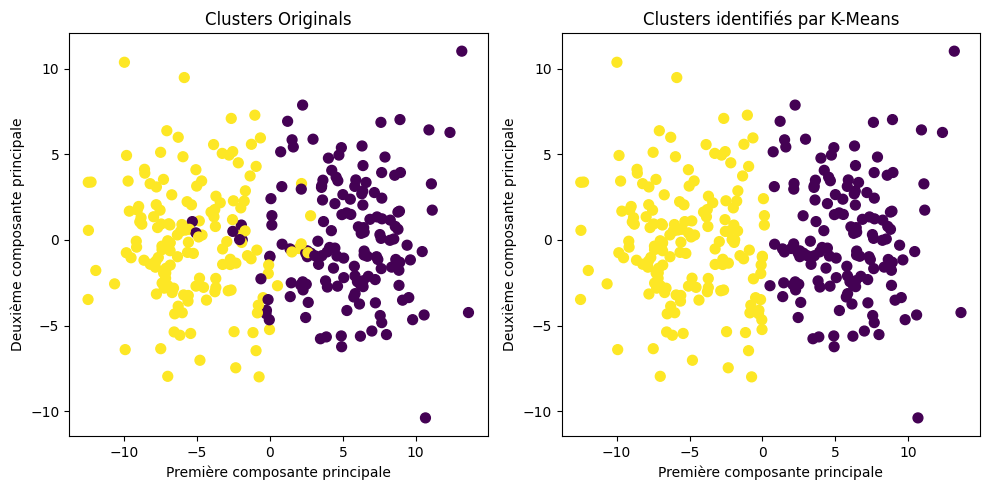

In [9]:
#grille pour deux graphiques placés côte-à-côte
gs = gridspec.GridSpec(1, 2)

#Premier graphique des clusters originals
ax = plt.subplot(gs[0,0])
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolors='k', s=20)
ax.set_title('Clusters Originals')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

#Second graphique des clusters identifiés par K-means
ax = plt.subplot(gs[0,1])
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', s=20)
ax.set_title('Clusters identifiés par K-Means')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

plt.show()



In [53]:
# Utiliser la méthode du coude pour trouver le nombre optimal de clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dfb_encoded)
    wcss.append(kmeans.inertia_)


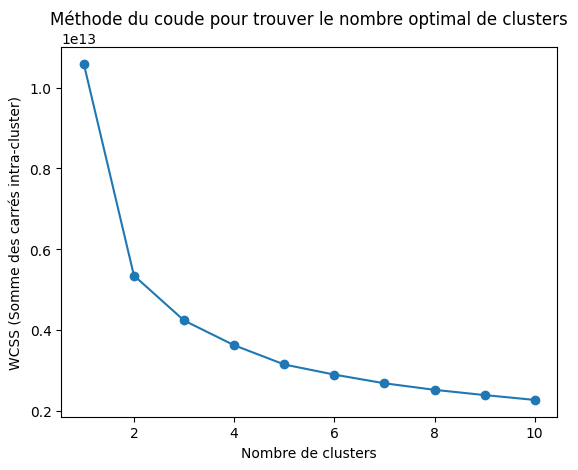

In [54]:
# Tracer le coude (Elbow) pour déterminer k
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Somme des carrés intra-cluster)')
plt.show()

In [2]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(dfb_scaled)
    silhouette_avg = silhouette_score(dfb_scaled, cluster_labels)
    print(f"Silhouette Score pour nombre de clusters {i} : {silhouette_avg}")

Silhouette Score pour nombre de clusters 2 : 0.19201851636008116
Silhouette Score pour nombre de clusters 3 : 0.13264551654255721
Silhouette Score pour nombre de clusters 4 : 0.14211198435395972
Silhouette Score pour nombre de clusters 5 : 0.13519499317365175
Silhouette Score pour nombre de clusters 6 : 0.12034011534652757
Silhouette Score pour nombre de clusters 7 : 0.13405401927948241
Silhouette Score pour nombre de clusters 8 : 0.12777757504443760
Silhouette Score pour nombre de clusters 9 : 0.13150729657564664
Silhouette Score pour nombre de clusters 10 : 0.12953691190793473


In [3]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(dfb_scaled)
    db_score = davies_bouldin_score(dfb_scaled, cluster_labels)
    print(f"Coefficient de Davies-Bouldin pour nombre de clusters {i} : {db_score}")


Coefficient de Davies-Bouldin pour nombre de clusters 2 : 1.858914526543241
Coefficient de Davies-Bouldin pour nombre de clusters 3 : 2.269439809329281
Coefficient de Davies-Bouldin pour nombre de clusters 4 : 2.044016187729111
Coefficient de Davies-Bouldin pour nombre de clusters 5 : 2.164001979656839
Coefficient de Davies-Bouldin pour nombre de clusters 6 : 2.080047162904707
Coefficient de Davies-Bouldin pour nombre de clusters 7 : 2.026555333784020
Coefficient de Davies-Bouldin pour nombre de clusters 8 : 2.024305922443897
Coefficient de Davies-Bouldin pour nombre de clusters 9 : 1.903632951636668
Coefficient de Davies-Bouldin pour nombre de clusters 10 : 1.990443567532189
